[Source of the data]
(https://data.cityofnewyork.us/City-Government/Citywide-Payroll-Data-Fiscal-Year-/k397-673e)

In [2]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

> **Some data set slices I will be using in this analysis:**
 >>- all_2020 - data with all employees in 2020 fiskal year\.
 >>- all_active_2020 - employess in 2020 with Active status.
 >>- annual_2020 -  employees with annual Pay Basis and Active status in 2020.
 >>- daily_2020  - employees with daily Pay Basis and Active status in 2020.
 >>- hourly_2020  - employees with hourly Pay Basis and Active status in 2020.

In [3]:
path = r"C:\Users\Maryla\Desktop\MY_PROJECTS\excel files\Citywide_Payroll_Data__Fiscal_Year_.csv"
dt = pd.read_csv(path)
dt.head()

C:\Users\Maryla\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,BEREZIN,MIKHAIL,NaN,08/10/2015,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
1,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,GEAGER,VERONICA,M,09/12/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
2,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,RAMANI,SHRADDHA,NaN,02/22/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
3,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,ROTTA,JONATHAN,D,09/16/2013,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
4,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,WILSON II,ROBERT,P,04/30/2018,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0


# Data info

In [4]:
dt.columns

Index(['Fiscal Year', 'Payroll Number', 'Agency Name', 'Last Name',
       'First Name', 'Mid Init', 'Agency Start Date', 'Work Location Borough',
       'Title Description', 'Leave Status as of June 30', 'Base Salary',
       'Pay Basis', 'Regular Hours', 'Regular Gross Paid', 'OT Hours',
       'Total OT Paid', 'Total Other Pay'],
      dtype='object')

In [5]:
dt['Fiscal Year'].unique()

array([2020, 2016, 2015, 2014, 2017, 2018, 2019], dtype=int64)

### For this analysis I want to include only data for 2020

In [4]:
all_2020 = dt[dt["Fiscal Year"] == 2020]
all_2020.head(3)

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,BEREZIN,MIKHAIL,NaN,08/10/2015,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
1,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,GEAGER,VERONICA,M,09/12/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
2,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,RAMANI,SHRADDHA,NaN,02/22/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0


In [7]:
all_2020.corr()

,Fiscal Year,Payroll Number,Base Salary,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
Fiscal Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Payroll Number,NaN,1.000000,-0.142726,-0.479778,-0.127927,-0.422975,-0.347407,-0.155014
Base Salary,NaN,-0.142726,1.000000,0.327461,0.830542,0.198147,0.202970,0.541370
Regular Hours,NaN,-0.479778,0.327461,1.000000,0.455837,0.598780,0.546972,0.229396
Regular Gross Paid,NaN,-0.127927,0.830542,0.455837,1.000000,0.294520,0.332870,0.485800
OT Hours,NaN,-0.422975,0.198147,0.598780,0.294520,1.000000,0.928075,0.347275
Total OT Paid,NaN,-0.347407,0.202970,0.546972,0.332870,0.928075,1.000000,0.368372
Total Other Pay,NaN,-0.155014,0.541370,0.229396,0.485800,0.347275,0.368372,1.000000


 There is a strong corelation between Base Salary and Regular Gross Paid. It should be stronger, but I think this stat is disrupted by the fact that some worker's base salary is set by daily or hourly. The correlation might be stronger within per Annum group. 
 
 

In [8]:
all_2020.shape

(590210, 17)

In [119]:
all_2020.describe()

,Fiscal Year,Payroll Number,Base Salary,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
count,590210.0,590210.000000,590210.000000,590210.000000,590210.000000,590210.000000,590210.000000,590210.000000
mean,2020.0,570.481605,46719.464393,665.752468,43360.649381,70.784212,3323.738909,4854.173231
std,0.0,303.359636,45027.001693,889.598387,41629.808457,177.673809,9136.375750,7331.188701
min,2020.0,2.000000,1.000000,-1260.000000,-50689.500000,-66.500000,-7382.660000,-69786.070000
25%,2020.0,300.000000,33.180000,0.000000,2265.000000,0.000000,0.000000,34.050000
50%,2020.0,742.000000,44930.000000,0.000000,36951.715000,0.000000,0.000000,1369.105000
75%,2020.0,747.000000,85292.000000,1820.000000,76725.640000,1.500000,77.630000,7762.022500
max,2020.0,996.000000,414707.000000,4160.000000,359818.400000,3147.000000,215022.810000,650000.000000


In 2020 there was a 590,210 job positions filled by the City of New York with base salaries ranging from \\$1 to \\$414,707 and a mean salary of \\$44,930. 

There is a strong trend toward not counting working hours: 50\% of city employees accrued zero working hours, with some having negative working hours. 

75\% employees worked between 0 and 1820 hours, where 1820 seems to be a full time (1820h/52 weeks = 35-hour work week). 25\% employees worked between 1820 and 4160 hours. 



###  For the further analysis I will only include workers with ‘Active’ leave status and only those with Regular Gross Paid above zero dollars. 

In [9]:
all_2020['Leave Status as of June 30'].value_counts()


ACTIVE                 482955
CEASED                  94357
ON LEAVE                 6997
SEASONAL                 5021
ON SEPARATION LEAVE       880
Name: Leave Status as of June 30, dtype: int64

But before I do it i want to take a quick look at who are those with negative pay:

In [10]:
all_2020[(all_2020["Regular Gross Paid"] <0)& (all_2020["Leave Status as of June 30"]=="ACTIVE")].head(10)

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
63055,2020,56.0,POLICE DEPARTMENT,LAPSLEY,STARSHEEMA,S,01/09/2013,BROOKLYN,POLICE OFFICER,ACTIVE,85292.0,per Annum,155.42,-202.39,0.0,0.0,5826.57
63749,2020,56.0,POLICE DEPARTMENT,CADET,RICHEDA,A,01/09/2006,QUEENS,POLICE OFFICER,ACTIVE,85292.0,per Annum,74.28,-236.23,0.0,0.0,1659.39
64237,2020,56.0,POLICE DEPARTMENT,SCHROEHER,KEITH,J,07/05/2017,BROOKLYN,POLICE OFFICER,ACTIVE,46000.0,per Annum,107.43,-65.40,0.0,0.0,707.96
65153,2020,56.0,POLICE DEPARTMENT,PATEL JR,SURENDRA,A,07/17/2017,MANHATTAN,EVIDENCE AND PROPERTY CONTROL SPECIALIST,ACTIVE,52745.0,per Annum,1260.00,-753.79,0.0,0.0,0.00
84380,2020,57.0,FIRE DEPARTMENT,FRANCOIS,ALAISHA,N,09/28/2009,BROOKLYN,EMERGENCY MEDICAL SPECIALIST-EMT,ACTIVE,50604.0,per Annum,1725.00,-2.64,0.0,0.0,12.26
93097,2020,67.0,ADMIN FOR CHILDREN'S SVCS,JOYNER,LUELLA,B,02/05/2018,BRONX,CHILD PROTECTIVE SPECIALIST,ACTIVE,55125.0,per Annum,-21.00,-186.49,0.0,0.0,-68.80
107440,2020,69.0,HRA/DEPT OF SOCIAL SERVICES,DE LA ROSA,ADA,E,08/27/2012,BRONX,ELIGIBILITY SPECIALIST,ACTIVE,43410.0,per Annum,0.00,-1131.62,0.0,0.0,1131.62
123270,2020,72.0,DEPARTMENT OF CORRECTION,GARCIA,EDWIN,J,01/08/2018,QUEENS,CORRECTION OFFICER,ACTIVE,48371.0,per Annum,1200.00,-734.58,0.0,0.0,1960.37
129388,2020,210.0,PUBLIC SERVICE CORPS,STEIN,SIERRA,N,07/09/2018,MANHATTAN,COLLEGE AIDE,ACTIVE,17.0,per Hour,-0.25,-4.25,0.0,0.0,0.00
129389,2020,210.0,PUBLIC SERVICE CORPS,ADINDA-OUGBA,NYAD,NaN,03/18/2019,MANHATTAN,COLLEGE AIDE,ACTIVE,16.0,per Hour,-40.25,-644.00,0.0,0.0,0.00


In [5]:
all_active_2020 = all_2020[(all_2020["Leave Status as of June 30"] == "ACTIVE") & (all_2020["Regular Gross Paid"] >0)] 

In [124]:
all_active_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 477228 entries, 0 to 585777
Data columns (total 17 columns):
Fiscal Year                   477228 non-null int64
Payroll Number                477228 non-null float64
Agency Name                   477228 non-null object
Last Name                     476935 non-null object
First Name                    476932 non-null object
Mid Init                      281662 non-null object
Agency Start Date             477187 non-null object
Work Location Borough         477226 non-null object
Title Description             477225 non-null object
Leave Status as of June 30    477228 non-null object
Base Salary                   477228 non-null float64
Pay Basis                     477228 non-null object
Regular Hours                 477228 non-null float64
Regular Gross Paid            477228 non-null float64
OT Hours                      477228 non-null float64
Total OT Paid                 477228 non-null float64
Total Other Pay               477228

### Null values cleaning

In [125]:
all_active_2020.isnull().sum()

Fiscal Year                        0
Payroll Number                     0
Agency Name                        0
Last Name                        293
First Name                       296
Mid Init                      195566
Agency Start Date                 41
Work Location Borough              2
Title Description                  3
Leave Status as of June 30         0
Base Salary                        0
Pay Basis                          0
Regular Hours                      0
Regular Gross Paid                 0
OT Hours                           0
Total OT Paid                      0
Total Other Pay                    0
dtype: int64

1. Looks like first and last names are missing in 293 cases. That  should not affect the data, but anyway I want to check why.

2. Agency start date mising in 41 instances, but it should not be a concern so I will not try to resolve it. 

3. Tite description is missing in 3 entries, maybe we can check if those pepople worked in previous years and replace nan. 

4. Also work location is missing in 2 cases; I will try to fix it.

##### Checking for missing Last Name values.

In [14]:
all_active_2020[all_active_2020["Last Name"].isnull()].tail(5)

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
533907,2020,906.0,DISTRICT ATTORNEY-SPECIAL NARC,NaN,NaN,NaN,06/11/2018,MANHATTAN,SENIOR RACKETS INVESTIGATOR - START >4-24-08 N...,ACTIVE,67049.0,per Annum,2080.0,64588.08,0.0,0.00,7993.0
533908,2020,906.0,DISTRICT ATTORNEY-SPECIAL NARC,NaN,NaN,NaN,09/04/2018,MANHATTAN,SENIOR RACKETS INVESTIGATOR - START >4-24-08 N...,ACTIVE,72000.0,per Annum,2080.0,67938.35,0.0,0.00,3500.0
533913,2020,906.0,DISTRICT ATTORNEY-SPECIAL NARC,NaN,NaN,NaN,04/01/2019,MANHATTAN,SENIOR RACKETS INVESTIGATOR - START >4-24-08 N...,ACTIVE,64000.0,per Annum,2080.0,63566.50,74.0,3402.32,2000.0
533915,2020,906.0,DISTRICT ATTORNEY-SPECIAL NARC,NaN,NaN,NaN,04/01/2019,MANHATTAN,SENIOR RACKETS INVESTIGATOR - START >4-24-08 N...,ACTIVE,69000.0,per Annum,2080.0,64550.36,1.0,46.70,3000.0
534028,2020,906.0,DISTRICT ATTORNEY-SPECIAL NARC,NaN,NaN,NaN,06/08/2020,MANHATTAN,SENIOR RACKETS INVESTIGATOR - START >4-24-08 N...,ACTIVE,65000.0,per Annum,80.0,2486.34,0.0,0.00,0.0


It seems like all people with missing names are working for Distric Attorney, and they names were most likey omitted on purpose :
 >" data for some agencies (specifically NYC Police Department (NYPD) and the District Attorneys’ Offices (Manhattan, Kings, Queens, Richmond, Bronx, and Special Narcotics)) have been redacted since they are exempt from disclosure pursuant to the Freedom of Information Law, POL § 87(2)(f), on the ground that disclosure of the information could endanger the life and safety of the public servants listed thereon." 

***

##### Checking for missing Title Description

In [15]:
all_active_2020[all_active_2020["Title Description"].isnull()]

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
274009,2020,464.0,COMMUNITY COLLEGE (QUEENSBORO),GREEN,BRUCE,S,11/01/2005,QUEENS,NaN,ACTIVE,67016.00,per Annum,2080.0,71046.78,67.5,5338.10,2636.09
274110,2020,464.0,COMMUNITY COLLEGE (QUEENSBORO),D'AMATO,JEFFREY,A,10/09/2017,QUEENS,NaN,ACTIVE,64158.00,per Annum,2080.0,64647.58,40.5,2806.53,1512.47
319029,2020,745.0,DEPT OF ED HRLY SUPPORT STAFF,ORTIZ,A,NaN,12/31/1999,MANHATTAN,NaN,ACTIVE,16.52,per Hour,0.0,16657.40,0.0,0.00,4810.05


I want to find out their titles by doing reserach in oryginal data set, maybe previous years data have this information:



In [16]:
dt[(dt["Last Name"]=="GREEN") & (dt["First Name"]=="BRUCE") & (dt["Agency Name"] =="COMMUNITY COLLEGE (QUEENSBORO)")]

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
274009,2020,464.0,COMMUNITY COLLEGE (QUEENSBORO),GREEN,BRUCE,S,11/01/2005,QUEENS,NaN,ACTIVE,67016.0,per Annum,2080.00,71046.78,67.50,5338.10,2636.09
725809,2016,NaN,COMMUNITY COLLEGE (QUEENSBORO),GREEN,BRUCE,S,11/01/2005,QUEENS,NaN,ACTIVE,56072.0,per Annum,2091.42,56624.79,505.00,20462.83,533.72
1263663,2015,NaN,COMMUNITY COLLEGE (QUEENSBORO),GREEN,BRUCE,S,11/01/2005,QUEENS,NaN,ACTIVE,56072.0,per Annum,2085.72,55918.45,558.50,22688.57,315.54
1816444,2014,464.0,COMMUNITY COLLEGE (QUEENSBORO),GREEN,BRUCE,S,11/01/2005,NaN,NaN,ACTIVE,56072.0,per Annum,2085.72,55918.45,391.25,15447.97,322.26
2305430,2017,NaN,COMMUNITY COLLEGE (QUEENSBORO),GREEN,BRUCE,S,11/01/2005,QUEENS,NaN,ACTIVE,61913.0,per Annum,2061.72,76970.11,343.00,20653.10,2730.28
2894338,2018,464.0,COMMUNITY COLLEGE (QUEENSBORO),GREEN,BRUCE,S,11/01/2005,QUEENS,NaN,ACTIVE,61913.0,per Annum,2045.72,61506.03,711.75,31618.65,1828.24
3447047,2019,464.0,COMMUNITY COLLEGE (QUEENSBORO),GREEN,BRUCE,S,11/01/2005,QUEENS,NaN,ACTIVE,61913.0,per Annum,2085.72,61743.49,525.75,23295.25,1749.56


In [17]:
dt[(dt["Last Name"]=="D'AMATO") & (dt["First Name"]=="JEFFREY") & (dt["Agency Name"] =="COMMUNITY COLLEGE (QUEENSBORO)")]

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
274110,2020,464.0,COMMUNITY COLLEGE (QUEENSBORO),D'AMATO,JEFFREY,A,10/09/2017,QUEENS,NaN,ACTIVE,64158.0,per Annum,2080.00,64647.58,40.50,2806.53,1512.47
2894365,2018,464.0,COMMUNITY COLLEGE (QUEENSBORO),D'AMATO,JEFFREY,A,10/09/2017,QUEENS,NaN,ACTIVE,50897.0,per Annum,1480.00,36115.89,391.75,14226.38,399.35
3447368,2019,464.0,COMMUNITY COLLEGE (QUEENSBORO),D'AMATO,JEFFREY,A,10/09/2017,QUEENS,NaN,ACTIVE,50897.0,per Annum,2085.72,50757.47,323.50,12191.03,1180.26


In [18]:
dt[(dt["Last Name"]=="ORTIZ") & (dt["First Name"]=="A") ]

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
319029,2020,745.0,DEPT OF ED HRLY SUPPORT STAFF,ORTIZ,A,NaN,12/31/1999,MANHATTAN,NaN,ACTIVE,16.52,per Hour,0.0,16657.40,0.0,0.00,4810.05
806136,2016,NaN,DEPT OF ED HRLY SUPPORT STAFF,ORTIZ,A,NaN,12/31/1999,MANHATTAN,NaN,ACTIVE,13.17,per Hour,0.0,11562.37,0.0,1621.92,0.00
2383412,2017,NaN,DEPT OF ED HRLY SUPPORT STAFF,ORTIZ,A,NaN,12/31/1999,MANHATTAN,NaN,ACTIVE,13.37,per Hour,0.0,18317.88,0.0,0.00,0.00
3084668,2018,745.0,DEPT OF ED HRLY SUPPORT STAFF,ORTIZ,A,NaN,12/31/1999,MANHATTAN,NaN,ACTIVE,15.38,per Hour,0.0,19288.76,0.0,0.00,0.00
3647711,2019,745.0,DEPT OF ED HRLY SUPPORT STAFF,ORTIZ,A,NaN,12/31/1999,MANHATTAN,NaN,ACTIVE,16.04,per Hour,0.0,21027.80,0.0,0.00,0.00


ok, this didnt work, lets try to find by payroll number

In [19]:
dt[(dt["Payroll Number"]==464)].head(5)

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
273444,2020,464.0,COMMUNITY COLLEGE (QUEENSBORO),LYNCH,TIMOTHY,G,04/04/2017,QUEENS,PRESIDENT,ACTIVE,220000.00,per Annum,1820.0,218799.45,0.0,0.00,24000.00
273445,2020,464.0,COMMUNITY COLLEGE (QUEENSBORO),NEWCOMB,SHERRI,L,09/08/2008,QUEENS,SENIOR VICE PRESIDENT,ACTIVE,199500.00,per Annum,1820.0,198411.40,0.0,0.00,1000.00
273446,2020,464.0,COMMUNITY COLLEGE (QUEENSBORO),CARBONE,JOSEPH,NaN,07/02/1990,QUEENS,STATIONARY ENGINEER,ACTIVE,486.72,per Day,2080.0,126547.20,529.5,48322.17,14602.48
273447,2020,464.0,COMMUNITY COLLEGE (QUEENSBORO),DI DIO,STEPHEN,M,06/10/2013,QUEENS,VICE PRESIDENT,ACTIVE,190000.00,per Annum,1820.0,188963.18,0.0,0.00,0.00
273448,2020,464.0,COMMUNITY COLLEGE (QUEENSBORO),PALMER,SANDRA,S,08/25/2015,QUEENS,VICE PRESIDENT,ACTIVE,190000.00,per Annum,1820.0,188963.18,0.0,0.00,0.00


Looks like payroll number is assosciated with agency not title..

Let try by salary and agency for A. Ortiz:

In [20]:
all_2020[(all_2020["Base Salary"]==16.52) & (all_2020["Agency Name"]=="DEPT OF ED HRLY SUPPORT STAFF")]["Title Description"].value_counts()

F/T SCHOOL AIDE            3319
F/T SCHOOL LUNCH HELPER    2622
SUBSTITUTE SCHOOL AIDE       64
F/T HEALTH SERVICE AIDE      19
Name: Title Description, dtype: int64

Seems like this salary is mostly associated with School Aide, I will replace NaN with exatly this title for our active_2020 data. 

In [6]:
all_active_2020.loc[(all_active_2020["Last Name"]=="ORTIZ") & (all_active_2020["First Name"]=="A"), "Title Description" ]= "F/T SCHOOL AIDE" 

C:\Users\Maryla\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [22]:
all_active_2020[(all_active_2020["Last Name"]=="ORTIZ") & (all_active_2020["First Name"]=="A") ]

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
319029,2020,745.0,DEPT OF ED HRLY SUPPORT STAFF,ORTIZ,A,NaN,12/31/1999,MANHATTAN,F/T SCHOOL AIDE,ACTIVE,16.52,per Hour,0.0,16657.4,0.0,0.0,4810.05


For D'AMATO JEFFREY

In [23]:
all_2020[(all_2020["Base Salary"] == 64158.00)]["Title Description"]

274110    NaN
Name: Title Description, dtype: object

GREEN BRUCE

In [24]:
all_2020[(all_2020["Base Salary"] == 67016.00)]["Title Description"]

274009    NaN
Name: Title Description, dtype: object

`Looks like for both GREEN BRUCE, D'AMATO JEFFREY I cannot find Title Desrription.. `

***

##### Checking for missing values for work location:

In [25]:
all_active_2020[all_active_2020["Work Location Borough"].isnull()]

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
162077,2020,742.0,DEPT OF ED PEDAGOGICAL,COLEMAN,KAWANA,D,07/01/1982,NaN,TEACHER SPECIAL EDUCATION,ACTIVE,124909.0,per Annum,0.0,122242.80,0.0,0.0,26460.23
419875,2020,744.0,DEPT OF ED PARA PROFESSIONALS,OMOGUN,DAYO,O,03/09/1987,NaN,ANNUAL ED PARA,ACTIVE,46333.0,per Annum,0.0,45344.28,0.0,0.0,27856.35


what is their work history?

In [26]:
dt[(dt["Last Name"]=="COLEMAN") & (dt["First Name"]=="KAWANA")]

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
162077,2020,742.0,DEPT OF ED PEDAGOGICAL,COLEMAN,KAWANA,D,07/01/1982,NaN,TEACHER SPECIAL EDUCATION,ACTIVE,124909.00,per Annum,0.0,122242.80,0.0,0.0,26460.23
377343,2020,747.0,DEPT OF ED PER SESSION TEACHER,COLEMAN,KAWANA,D,07/01/1982,MANHATTAN,TEACHER- PER SESSION,ACTIVE,33.18,per Day,0.0,1955.77,0.0,0.0,400.02
865609,2016,NaN,DEPT OF ED PEDAGOGICAL,COLEMAN,KAWANA,D,07/01/1982,NaN,TEACHER SPECIAL EDUCATION,ACTIVE,103540.00,per Annum,0.0,91897.22,0.0,0.0,0.00
978698,2016,NaN,DEPT OF ED PER SESSION TEACHER,COLEMAN,KAWANA,D,07/01/1982,MANHATTAN,TEACHER- PER SESSION,ACTIVE,33.18,per Day,0.0,308.77,0.0,0.0,0.00
1402126,2015,NaN,DEPT OF ED PEDAGOGICAL,COLEMAN,KAWANA,D,07/01/1982,NaN,TEACHER SPECIAL EDUCATION,ACTIVE,90997.00,per Annum,0.0,98475.42,0.0,0.0,0.40
1528161,2015,NaN,DEPT OF ED PER SESSION TEACHER,COLEMAN,KAWANA,D,07/01/1982,MANHATTAN,TEACHER- PER SESSION,ACTIVE,33.18,per Day,0.0,1049.90,0.0,0.0,0.00
1851131,2014,742.0,DEPT OF ED PEDAGOGICAL,COLEMAN,KAWANA,D,07/01/1982,NaN,TEACHER SPECIAL EDUCATION,ACTIVE,86590.00,per Annum,0.0,94278.75,0.0,0.0,1000.00
2015661,2014,747.0,DEPT OF ED PER SESSION TEACHER,COLEMAN,KAWANA,D,07/01/1982,NaN,TEACHER- PER SESSION,ACTIVE,33.18,per Day,0.0,5667.30,0.0,0.0,0.00
2443918,2017,NaN,DEPT OF ED PEDAGOGICAL,COLEMAN,KAWANA,D,07/01/1982,NaN,TEACHER SPECIAL EDUCATION,ACTIVE,108251.00,per Annum,0.0,105350.46,0.0,0.0,3.28
2555466,2017,NaN,DEPT OF ED PER SESSION TEACHER,COLEMAN,KAWANA,D,07/01/1982,MANHATTAN,TEACHER- PER SESSION,ACTIVE,33.18,per Day,0.0,2842.89,0.0,0.0,0.00


Looks like this person is working two jobs, one full time teacher and second part time as a session teacher plus it looks like most of the time he/she is working in Manhattan. 

In [27]:
dt[(dt["Last Name"]=="OMOGUN") & (dt["First Name"]=="DAYO")]

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
419875,2020,744.0,DEPT OF ED PARA PROFESSIONALS,OMOGUN,DAYO,O,03/09/1987,NaN,ANNUAL ED PARA,ACTIVE,46333.0,per Annum,0.0,45344.28,0.0,0.00,27856.35
835920,2016,NaN,DEPT OF ED PARA PROFESSIONALS,OMOGUN,DAYO,O,03/09/1987,NaN,ANNUAL ED PARA,ACTIVE,39291.0,per Annum,0.0,51253.86,0.0,133.89,0.00
1371713,2015,NaN,DEPT OF ED PARA PROFESSIONALS,OMOGUN,DAYO,O,03/09/1987,NaN,ANNUAL ED PARA,ACTIVE,37966.0,per Annum,0.0,50193.22,0.0,33.09,0.00
1949041,2014,744.0,DEPT OF ED PARA PROFESSIONALS,OMOGUN,DAYO,O,03/09/1987,NaN,ANNUAL ED PARA,ACTIVE,36127.0,per Annum,0.0,50292.76,0.0,586.29,1000.00
2413877,2017,NaN,DEPT OF ED PARA PROFESSIONALS,OMOGUN,DAYO,O,03/09/1987,NaN,ANNUAL ED PARA,ACTIVE,41079.0,per Annum,0.0,45995.96,0.0,0.00,0.00
3038084,2018,744.0,DEPT OF ED PARA PROFESSIONALS,OMOGUN,DAYO,O,03/09/1987,NaN,ANNUAL ED PARA,ACTIVE,43140.0,per Annum,0.0,56744.83,0.0,495.40,0.00
3596148,2019,744.0,DEPT OF ED PARA PROFESSIONALS,OMOGUN,DAYO,O,03/09/1987,NaN,ANNUAL ED PARA,ACTIVE,45203.0,per Annum,0.0,60184.36,0.0,8.40,0.00


Because this didn't give me any answers I googled him and got Manhattan as his work borough 
(https://opengovus.com/new-york-employee/OMOGUN,_NOSAKHARE_I).

I will change for both to be Manhattan.

In [8]:
indices = [419875, 162077]

In [9]:
all_active_2020.loc[indices, "Work Location Borough" ] = "MANHATTAN"

In [10]:
all_active_2020[all_active_2020["Work Location Borough"].isnull()]

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay


***
# Now let's take a look at all active employess in 2020
***

In [31]:
all_active_2020.describe()

,Fiscal Year,Payroll Number,Base Salary,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
count,477228.0,477228.000000,477228.000000,477228.000000,477228.000000,477228.000000,477228.000000,477228.000000
mean,2020.0,556.818739,49462.187477,774.688947,51452.311863,84.528514,3970.783888,5054.276528
std,0.0,310.287532,44961.936289,932.368002,41385.105717,192.514707,9915.350037,6696.435071
min,2020.0,2.000000,1.000000,-35.000000,0.010000,-21.000000,-2734.970000,-69786.070000
25%,2020.0,300.000000,33.180000,0.000000,9358.512500,0.000000,0.000000,48.250000
50%,2020.0,742.000000,47705.000000,0.000000,47474.635000,0.000000,0.000000,1837.730000
75%,2020.0,747.000000,85292.000000,1820.000000,84831.140000,24.500000,899.640000,8570.990000
max,2020.0,996.000000,414707.000000,4160.000000,359818.400000,3147.000000,215022.810000,222247.000000


Some numbers here are a bit disturbing: 

- min regular gross paid was 1 cent and base salary was 1 dollar?
- "total other  pay" being negative number - 69,786?
- negative overtime? 
- 50% employess dont have any working hours last year, with some having negative work hours

Let's try to find some answers:

***
## Exploring Working Hours

#### For this I will use all_active_2020 data set
***

In [18]:
all_active_2020["Regular Hours"].describe()

count    477228.000000
mean        774.688947
std         932.368002
min         -35.000000
25%           0.000000
50%           0.000000
75%        1820.000000
max        4160.000000
Name: Regular Hours, dtype: float64

1. Data shows that 50\% of all employees in 2020 worked zero hours. How is this possible? 
    -  what are their Title Descriptions?
    - did they made any money, if yes what are their salaries?
    - what agency they work for?
    - are they fill time or part time workers?
    

2. Why there are people with less then zero working hours?

3. Who worked 4,160 hours? - duble shift every day? 

In [23]:
hours_work_less_then_0 = all_active_2020["Regular Hours"].apply(lambda x: True if x <= 0 else False )
len(hours_work_less_then_0[hours_work_0 == True])

266914

*** There is 266,914 employees with working hours below zero.***

I will create two slices of the data set that will contain only workers with zero working hours and those with below zero working hours.

In [12]:
zero_working_hours = all_active_2020[all_active_2020["Regular Hours"]==0]
negative_working_hours = all_active_2020[all_active_2020["Regular Hours"]<0]
#print(type(zero_working_hours.shape))
print("There was ", zero_working_hours.shape[0], " employees with zero working hours in 2020.")
print("There was ", negative_working_hours.shape[0], " employees with negative working hours in 2020.")

There was  266912  employees with zero working hours in 2020.
There was  2  employees with negative working hours in 2020.


> zero_wokrking_hours - data set containing only employees working exactly zero hours.

***
### Exploring negative working hours entries
***

In [35]:
negative_working_hours

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
273160,2020,463.0,COMMUNITY COLLEGE (BRONX),HASTICK,MAVIS,M,10/23/2004,QUEENS,COLLEGE ASSISTANT,ACTIVE,23.74,per Hour,-35.00,39.18,0.0,0.0,0.0
295643,2020,469.0,COMMUNITY COLLEGE (LAGUARDIA),VILLALOBOS,MICHELLE,NaN,09/24/2018,QUEENS,CONTINUING EDUCATION TEACHER,ACTIVE,56.10,per Hour,-1.75,2.85,0.0,0.0,0.0


I cannot explain why they would have negative working hours...
Seems like they did not work at all in 2020 - they did not earn any substancial salary anyway. 


***
### Exploring  zero working hours.
***

In [36]:
zero_working_hours["Pay Basis"].value_counts(normalize = True)

per Annum          0.453955
per Day            0.356777
per Hour           0.189265
Prorated Annual    0.000004
Name: Pay Basis, dtype: float64

Out of 266912 employees with 0 working hours 46% is employed on annual therm  and 54% per hour or per day. 

#### Let's find out:
- at what agencies these people work,
- what are their most common job titles, 
- and also did they actually received salary despite having zero hours entered in the system?
- which agencies have only employees with zero hours?

In [25]:
groupin_0_hours = zero_working_hours.groupby([ "Title Description"]).agg({"Agency Name":"count", "Base Salary":"mean", "Regular Gross Paid":"mean"})
groupin_0_hours.columns=["Title count", "Avg base salary", "Avg gross paid"]
groupin_0_hours.nlargest(20,"Title count")

,Title count,Avg base salary,Avg gross paid
Title Description,,,
TEACHER- PER SESSION,74004,33.247556,3812.523746
TEACHER,52249,95706.312791,91327.391313
ELECTION WORKER,30635,1.010021,813.953105
ANNUAL ED PARA,25501,39070.479746,37037.034376
TEACHER SPECIAL EDUCATION,24672,88634.141780,83303.760997
TEACHER-GENERAL ED,10419,129.940808,13001.678151
SUBSTITUTE ED PARA,7661,161.740500,14455.102733
F/T SCHOOL AIDE,7074,16.379432,19627.970966
ASSISTANT PRINCIPAL,3406,130741.596994,126260.419865


In [38]:
zero_working_hours["Agency Name"].value_counts()

DEPT OF ED PEDAGOGICAL            95468
DEPT OF ED PER SESSION TEACHER    76353
DEPT OF ED PARA PROFESSIONALS     33361
BOARD OF ELECTION POLL WORKERS    30967
DEPT OF ED HRLY SUPPORT STAFF     17295
DEPT OF ED PER DIEM TEACHERS      11214
DOE CUSTODIAL PAYROL               1233
COMMUNITY COLLEGE (LAGUARDIA)       410
COMMUNITY COLLEGE (MANHATTAN)       252
COMMUNITY COLLEGE (HOSTOS)          130
COMMUNITY COLLEGE (BRONX)            69
COMMUNITY COLLEGE (KINGSBORO)        64
COMMUNITY COLLEGE (QUEENSBORO)       46
GUTTMAN COMMUNITY COLLEGE            44
HUNTER COLLEGE HIGH SCHOOL            2
DEPT OF PARKS & RECREATION            2
DEPARTMENT OF EDUCATION ADMIN         1
CUNY CENTRAL OFFICE                   1
Name: Agency Name, dtype: int64

Seems like most of the employees with zero working ours work in education as teachers or aid, with the exception of 30,967 working for NYC Board of Elections. 

***
### Lets find out what are the proportions in these aganecies of workers with zero hours and over zero hours, as well as their respective pay basis.
***

In [17]:
zero_working_agencies = zero_working_hours["Agency Name"].unique()


>agencies_with_zero - data set for all agencies that, in some degree, contain workers with zero hours. This data set is including workers that have zero as well as those who have working hours above zero.>

>Making a new column with indication if employee worked 0 hours or over zero.

In [22]:
agencies_with_zero = all_active_2020[all_active_2020["Agency Name"].isin(zero_working_agencies)]


agencies_with_zero["Hours Count"]= agencies_with_zero["Regular Hours"].apply(lambda x: "zero" if x==0 else "over zero")


C:\Users\Maryla\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [26]:
cross_tab_zero_hours = pd.crosstab(agencies_with_zero["Pay Basis"], agencies_with_zero["Hours Count"])
cross_tab_zero_hours

Hours Count,over zero,zero
Pay Basis,,
Prorated Annual,1089,1
per Annum,22072,121166
per Day,1940,95228
per Hour,10625,50517


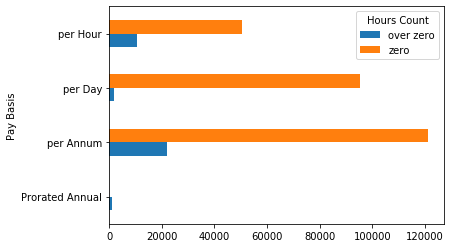

In [27]:
cross_tab_zero_hours.plot.barh()
plt.show()

What is suprising here is that most of the per hour and per day workers had not have  any working hours recorded. How in this case are their salaries calculated???? 

Are these proportions similar for all the 2020 active workers data?


In [19]:
all_active_2020["Hours Count"]= all_active_2020["Regular Hours"].apply(lambda x: "zero" if x==0 else "over zero")

C:\Users\Maryla\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


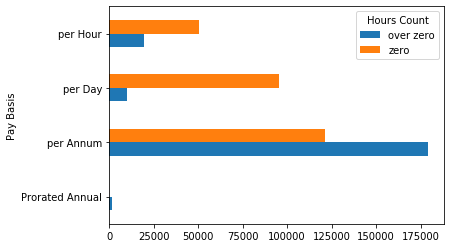

In [20]:
cross_tab_zero_hours_all_active_2020 = pd.crosstab(all_active_2020["Pay Basis"], all_active_2020["Hours Count"])
cross_tab_zero_hours_all_active_2020.plot.barh()
plt.show()

Looks like the same trend emerges for all active employees in 2020. Among per-hour and per-day emploeeys majority did not have any hours recorded! 

The big difference is in annualy hired workers: most of them have their hours recorded while in educational data set ( these that hire most of the annaul employess do not record their hours). 

***
### Which agencies have only employees with zero hours?
***

In [28]:
agencies_only_zero = pd.crosstab(agencies_with_zero["Agency Name"], agencies_with_zero["Hours Count"])
agencies_only_zero[agencies_only_zero["over zero"] == 0]

Hours Count,over zero,zero
Agency Name,,
BOARD OF ELECTION POLL WORKERS,0,30967
DEPT OF ED HRLY SUPPORT STAFF,0,17295
DEPT OF ED PARA PROFESSIONALS,0,33361
DEPT OF ED PEDAGOGICAL,0,95468
DEPT OF ED PER DIEM TEACHERS,0,11214
DEPT OF ED PER SESSION TEACHER,0,76353
DOE CUSTODIAL PAYROL,0,1233


#### What are the agencies hiring per annum where hours are not counted at all?

In [29]:
agencies_with_zero[(agencies_with_zero["Pay Basis"] =="per Annum") & (agencies_with_zero["Hours Count"] == "zero")]['Agency Name'].value_counts()

DEPT OF ED PEDAGOGICAL           95468
DEPT OF ED PARA PROFESSIONALS    25698
Name: Agency Name, dtype: int64

These are only two agancies where employment is based on annual salary and where working hours are not counted, it make some sensein this case. 



#### What about other employees whos salary is based on how much they actualy worked (hourly, daily workers) and who acctually received a salary..??

In [33]:
zero_hours_get_paid = agencies_with_zero[((agencies_with_zero["Pay Basis"] =="per Hour") | (agencies_with_zero["Pay Basis"] =="per Day")) & (agencies_with_zero["Hours Count"] == "zero") & (agencies_with_zero['Regular Gross Paid']>0)]


>zero_hours_get_paid  - data set with all per hour and per day workers who received salary in 2020

In [35]:
zero_hours_get_paid['Agency Name'].value_counts()

DEPT OF ED PER SESSION TEACHER    76353
BOARD OF ELECTION POLL WORKERS    30967
DEPT OF ED HRLY SUPPORT STAFF     17295
DEPT OF ED PER DIEM TEACHERS      11214
DEPT OF ED PARA PROFESSIONALS      7663
DOE CUSTODIAL PAYROL               1233
COMMUNITY COLLEGE (LAGUARDIA)       410
COMMUNITY COLLEGE (MANHATTAN)       252
COMMUNITY COLLEGE (HOSTOS)          130
COMMUNITY COLLEGE (BRONX)            69
COMMUNITY COLLEGE (KINGSBORO)        64
COMMUNITY COLLEGE (QUEENSBORO)       46
GUTTMAN COMMUNITY COLLEGE            44
HUNTER COLLEGE HIGH SCHOOL            2
DEPT OF PARKS & RECREATION            2
CUNY CENTRAL OFFICE                   1
Name: Agency Name, dtype: int64

WOW! Looks like they did make some earnings but no hours entered. I am guessing this is some kind of data omission. 

Let's just see a sample of this data:

In [30]:
zero_hours_get_paid.head(5)

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,Hours Count
6600,2020,300.0,BOARD OF ELECTION POLL WORKERS,BLANFORD,DONALD,C,01/01/2019,MANHATTAN,ELECTION WORKER,ACTIVE,1.0,per Hour,0.0,350.0,0.0,0.0,0.0,zero
6895,2020,300.0,BOARD OF ELECTION POLL WORKERS,BLANKS,MONIQUE,NaN,01/02/2017,MANHATTAN,ELECTION WORKER,ACTIVE,1.0,per Hour,0.0,350.0,0.0,0.0,0.0,zero
10512,2020,300.0,BOARD OF ELECTION POLL WORKERS,BLAZEJESKI,MARK,NaN,01/01/2019,MANHATTAN,ELECTION WORKER,ACTIVE,1.0,per Hour,0.0,350.0,0.0,0.0,0.0,zero
11223,2020,300.0,BOARD OF ELECTION POLL WORKERS,BLOCH,PETER,M,01/01/2014,MANHATTAN,ELECTION WORKER,ACTIVE,1.0,per Hour,0.0,350.0,0.0,0.0,0.0,zero
31868,2020,300.0,BOARD OF ELECTION POLL WORKERS,BLOCKER,MALINDA,NaN,01/02/2012,MANHATTAN,ELECTION WORKER,ACTIVE,1.0,per Hour,0.0,350.0,0.0,0.0,0.0,zero


In [44]:
zero_hours_get_paid.describe()

,Fiscal Year,Payroll Number,Base Salary,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
count,145745.0,145745.000000,145745.000000,145745.0,145745.000000,145745.0,145745.000000,145745.000000
mean,2020.0,644.986710,664.013836,0.0,6879.764070,0.0,0.006350,948.729066
std,0.0,187.375467,8597.297964,0.0,12825.759402,0.0,0.656019,2462.086148
min,2020.0,202.000000,1.000000,0.0,0.010000,0.0,0.000000,-5602.800000
25%,2020.0,744.000000,16.520000,0.0,557.440000,0.0,0.000000,0.000000
50%,2020.0,747.000000,33.180000,0.0,2139.050000,0.0,0.000000,24.100000
75%,2020.0,747.000000,33.180000,0.0,8876.370000,0.0,0.000000,470.700000
max,2020.0,846.000000,160683.390000,0.0,184341.460000,0.0,148.350000,80439.330000


- Looks like majority of daily and hourly employees earned below \\$2,139 in 2020. 
- The max salary was \\$184,341.
- 75\% employees base salary was below \\$33.18.


***
### Exploring above average working hours
***

#### For this excersise I will take create a data set with only employees that workes at least one hour in 2020.

> above_zero_hours - employees wokring at least one hour in 2020

In [75]:
above_zero_hours = all_active_2020[all_active_2020["Regular Hours"]>=1]

In [76]:
above_zero_hours.describe()

,Fiscal Year,Payroll Number,Base Salary,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
count,210301.0,210301.000000,210301.000000,210301.000000,210301.000000,210301.000000,210301.000000,210301.000000
mean,2020.0,388.792650,63103.773207,1757.972100,65813.706876,191.817317,9010.743308,6325.251476
std,0.0,375.059025,37463.113524,494.069455,33581.360015,252.038594,13329.935635,7397.702358
min,2020.0,2.000000,3.000000,1.000000,4.590000,-21.000000,-2734.970000,-69786.070000
25%,2020.0,56.000000,43496.000000,1820.000000,43508.190000,0.000000,0.000000,475.720000
50%,2020.0,72.000000,61598.000000,1820.000000,61905.540000,68.500000,2627.220000,3468.770000
75%,2020.0,826.000000,85292.000000,2080.000000,84831.140000,323.720000,13576.070000,10154.880000
max,2020.0,996.000000,414707.000000,4160.000000,348108.430000,3147.000000,215022.810000,222247.000000


Most annual employees worked at least 1820 hours a year which counts as a full time. 

25\% worked above this amount, as high as 4,160 hours - who is the 'top worker'?

In [77]:
above_zero_hours.nlargest(1, "Regular Hours")

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,Hours Count
110775,2020,72.0,DEPARTMENT OF CORRECTION,JOHNSON,DAVID,NaN,05/26/2011,QUEENS,CORRECTION OFFICER,ACTIVE,85292.0,per Annum,4160.0,169314.96,584.5,20853.77,30833.61,over zero


### What are some other job titles with above average working hours?

In [162]:
above_zero_hours.groupby("Title Description").agg({"Regular Hours":"max"}).nlargest(10, "Regular Hours")

,Regular Hours
Title Description,
CORRECTION OFFICER,4160.00
ASSISTANT CITY HIGHWAY REPAIRER,2936.00
PSYCHIATRIST,2438.50
ENVIRONMENTAL POLICE OFFICER,2340.00
FIREFIGHTER,2320.03
LIFE GUARD,2286.17
SUPERVISING EMERGENCY MEDICAL SERVICE SPECIALIST,2279.00
EMERGENCY MEDICAL SPECIALIST-EMT,2277.42
EMERGENCY MEDICAL SPECIALIST-PARAMEDIC,2263.00


***
## Exploring Base Salaries:
This data can be skewed by the fact that some salaries are entered as annual and some as hourly or daily. To get accurate stat I need to separate these entries. 


### I think that for accuracy  this data should be separated while working on salaries
***

In [52]:
all_active_2020['Pay Basis'].unique()

array(['per Annum', 'per Hour', 'Prorated Annual', 'per Day'],
      dtype=object)

In [108]:
all_active_2020['Pay Basis'].value_counts(normalize = True)

per Annum          0.631847
per Day            0.220905
per Hour           0.143799
Prorated Annual    0.003449
Name: Pay Basis, dtype: float64

In [47]:
annual_2020 = all_active_2020[(all_active_2020['Pay Basis'] == 'per Annum' ) | (all_active_2020['Pay Basis'] == 'Prorated Annual' )]

In [48]:
daily_2020 = all_active_2020[all_active_2020['Pay Basis'] == 'per Day']
hourly_2020 = all_active_2020[all_active_2020['Pay Basis'] == 'per Hour']

***
### Exploring annual salaries
***

In [57]:
annual_2020["Base Salary"].describe()

count    301948.000000
mean      77841.008489
std       31091.388387
min        3912.000000
25%       50604.000000
50%       77318.000000
75%       97324.000000
max      414707.000000
Name: Base Salary, dtype: float64

- There is 301,948 employees whose salary is based annualy. 
- 50\% annual salares were in  between \\$50,604 and \\$97,324 
- Max base salary was \\$414,707  and min was \\$3,912

### Top ten annual base salaries:

In [108]:
annual_2020.groupby(['Title Description']).agg({'Base Salary':'mean', "Regular Gross Paid":"mean"}).nlargest(10, "Base Salary")

,Base Salary,Regular Gross Paid
Title Description,,
CHANCELLOR,363346.000000,359818.400000
PENSION INVESTMENT ADVISOR,350000.000000,348108.430000
CHAIR,328939.000000,293011.080000
CHIEF ACTUARY,311885.000000,307146.050000
FIRST DEPUTY MAYOR,291139.000000,286715.070000
MAYOR,258750.000000,257351.530000
DEPUTY MAYOR,251982.000000,226194.476000
DIRECTOR OF INVESTMENTS,247344.666667,245430.153333
FIRST ASSISTANT CORPORATION COUNSEL,243272.000000,239575.510000


### Bottom 10 annual base salaries 

In [107]:
annual_2020.groupby(['Title Description']).agg({'Base Salary':'mean', "Regular Gross Paid":"mean"}).nsmallest(10, "Base Salary")

,Base Salary,Regular Gross Paid
Title Description,,
SUMMER COLLEGE INTERN,15643.000000,14532.900000
TEACHER ASSISTANT - REG SUB,22500.000000,20156.261250
CITY SECURITY AIDE,26210.852941,24638.316176
TEACHER AIDE,28050.011236,26578.356236
COMMUNITY SERVICE AIDE,28104.227273,25706.471636
ASSISTANT TEACHER,29739.833333,24087.972500
ASSISTANT MEDIA SERVICES TECHNICAN,29934.500000,30194.910000
TEMPORARY CLERK,29965.833333,28386.815000
FINGERPRINT TECHNICIAN TRAINEE,30459.000000,20807.138000


***
### Exploring daily salaries
***

#### What the most common daily type of jobs and much do they pay?

In [156]:
daily_2020.groupby("Title Description").agg({"Title Description":"count", "Regular Gross Paid":"mean"}).nlargest(10, "Title Description")

,Title Description,Regular Gross Paid
Title Description,,
TEACHER- PER SESSION,74004,3812.523746
TEACHER-GENERAL ED,10419,13001.678151
SUBSTITUTE ED PARA,7661,14455.102733
SCHOOL SECRETARY PER SESSION,1301,3661.772629
MAINTENANCE WORKER,1234,60812.974822
SUPERVISOR PER SESSION,1048,3804.222948
AUTO MECHANIC,965,88512.953264
SEWAGE TREATMENT WORKER,613,88690.201158
ELECTRICIAN,528,102469.238693


#### What are the most profitable daily jobs?

In [158]:
daily_2020.groupby("Title Description").agg({ "Regular Gross Paid":"mean"}).nlargest(10, "Regular Gross Paid")

,Regular Gross Paid
Title Description,
SENIOR STATIONARY ENGINEER,152842.617383
CRANE OPERATOR AMPES,147591.917143
GASOLINE ROLLER ENGINEER-L15,147564.840588
MOTOR GRADER OPERATOR,140501.003000
WELDER,140101.160870
TRACTOR OPERATOR,137419.017895
SUPERVISOR OF MECHANICS,131028.474571
STATIONARY ENGINEER,128140.776509
OILER,123685.370180


## Exploring hourly wages

### Top 10 hourly wages

In [101]:
hourly_2020.groupby(['Title Description']).agg({'Base Salary':'mean', "Regular Gross Paid":"mean"}).nlargest(10, "Base Salary")

,Base Salary,Regular Gross Paid
Title Description,,
CUSTODIAN ENGINEER,73799.588824,92293.492887
CHAIRMAN,496.310000,95445.460000
COMMISSIONER,338.925000,44432.677500
"MEMBER, CIVILIAN COMPLAINT REVIEW BOARD",318.100000,8536.500000
SUBSTITUTE TEACHER,193.470000,2925.304419
MEMBER OF THE ENVIRONMENTAL CONTROL BOARD - OATH,175.100000,1969.875000
CITY MEDICAL DIRECTOR,142.550000,143917.145000
PROFESSOR,104.397727,5168.972727
ADJUNCT PROFESSOR,103.040000,3115.860000


I think it has to be some sort of mistake here. No one is making 73,799 per hour!

In [106]:
hourly_2020[hourly_2020["Title Description"] == "CUSTODIAN ENGINEER"]["Base Salary"].value_counts()

1.00         442
136060.23     74
126971.41     57
145968.23     24
102780.29     16
            ... 
93141.99       1
90982.41       1
95592.66       1
94590.97       1
95478.30       1
Name: Base Salary, Length: 296, dtype: int64

I think all these who make more then a dollar per hour are paif on annual basis - seems like there is a mistake here in data entry!

In [100]:
hourly_2020.groupby(['Title Description']).agg({'Base Salary':'mean', "Regular Gross Paid":"mean"}).nlargest(10, "Base Salary")

,Base Salary,Regular Gross Paid
Title Description,,
CUSTODIAN ENGINEER,73799.588824,92293.492887
CHAIRMAN,496.310000,95445.460000
COMMISSIONER,338.925000,44432.677500
"MEMBER, CIVILIAN COMPLAINT REVIEW BOARD",318.100000,8536.500000
SUBSTITUTE TEACHER,193.470000,2925.304419
MEMBER OF THE ENVIRONMENTAL CONTROL BOARD - OATH,175.100000,1969.875000
CITY MEDICAL DIRECTOR,142.550000,143917.145000
PROFESSOR,104.397727,5168.972727
ADJUNCT PROFESSOR,103.040000,3115.860000


***
## Exploring Regular Gross Paid
***


### Who took home the most in 2020?

In [109]:
all_active_2020[all_active_2020["Regular Gross Paid"] == all_active_2020["Regular Gross Paid"].max()]

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,Hours Count
157694,2020,742.0,DEPT OF ED PEDAGOGICAL,CARRANZA,RICHARD,A,04/02/2018,MANHATTAN,CHANCELLOR,ACTIVE,363346.0,per Annum,0.0,359818.4,0.0,0.0,205.78,zero


### Which work titles take home the most in comparison to their base salary
#####  for this i will use annual workers only

In [141]:
take_home_vs_base=annual_2020.groupby("Title Description").agg({"Base Salary":"mean", "Regular Gross Paid":"mean"})


In [142]:
take_home_vs_base["Take Home Difference"]= ((take_home_vs_base['Regular Gross Paid'] - take_home_vs_base["Base Salary"])/take_home_vs_base["Base Salary"])*100

In [143]:
take_home_vs_base.nlargest(10,"Take Home Difference")

,Base Salary,Regular Gross Paid,Take Home Difference
Title Description,,,
CITY PEST CONTROL AIDE,37755.842105,43592.440000,15.458794
UNIVERSITY ARCHITECT,114610.000000,121538.820000,6.045563
UNIVERSITY ASSISTANT ARCHITECT,63290.000000,67106.260000,6.029799
UNIVERSITY ASSISTANT ENGINEER,75132.000000,79657.410000,6.023279
PURCHASING AGENT,62101.636364,65799.142727,5.953960
EOC ADMINISTRATIVE ASSISTANT,57629.000000,61039.390000,5.917837
DISABILITY ACCOMMODATIONS SPECIALIST,60947.000000,64547.430000,5.907477
COLLEGE PRINT SHOP COORDINATOR,64373.000000,68153.416667,5.872674
SUPERVISOR ASSIGNED,139580.476190,147728.680952,5.837639


***
## Exploring Overtime Hours
***

###  Who is person with the most ovetime hours in 2020

In [85]:
all_active_2020[all_active_2020['OT Hours'] == all_2020['OT Hours'].max()]

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,Hours Count
110727,2020,72.0,DEPARTMENT OF CORRECTION,MALCOLM,OMAR,T,09/06/2012,QUEENS,WARDEN-ASSISTANT DEPUTY WARDEN TED < 11/1/92,ACTIVE,111142.0,per Annum,2080.0,110385.63,3147.0,127375.43,13559.4,over zero


###  Who is person with the most overtime pay in 2020?

In [86]:
max_pay= all_active_2020['Total OT Paid'].max()
all_active_2020[all_active_2020['Total OT Paid'] == max_pay ]

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,Hours Count
534090,2020,996.0,NYC HOUSING AUTHORITY,PROCIDA,ROBERT,NaN,04/13/1987,BRONX,SUPERVISOR PLUMBER,ACTIVE,387.03,per Day,1820.0,100627.8,1944.5,215022.81,6468.93,over zero


###  Top 5 agencies with the most OT hours in 2020

In [87]:
overtime_2020 = all_active_2020.groupby("Agency Name").agg({'Total OT Paid': "sum", "OT Hours":'sum'})

overtime_2020.nlargest(5, 'OT Hours')

,Total OT Paid,OT Hours
Agency Name,,
POLICE DEPARTMENT,7.863535e+08,17249382.31
FIRE DEPARTMENT,3.254463e+08,7424338.40
DEPARTMENT OF CORRECTION,1.433310e+08,3421047.90
NYC HOUSING AUTHORITY,1.332506e+08,2525573.50
DEPARTMENT OF SANITATION,1.477884e+08,2501497.24


Police Department toped the list with 786,353,500 dollars in overtime paid to its employees.

Fire Department on secon place with \$ 325,446,300 

Those are the agancies where an employee can make the most of overtime.

### Ten top jobs with most overtime oportunities
#### I will use max OT paid in respective title:


In [145]:
all_active_2020.groupby("Title Description").agg({"Total OT Paid":"max", "OT Hours":"max"}).nlargest(10,"Total OT Paid")

,Total OT Paid,OT Hours
Title Description,,
SUPERVISOR PLUMBER,215022.81,1944.50
SENIOR STATIONARY ENGINEER,189637.73,1724.00
PLUMBER,188401.11,1842.50
SUPERVISOR ELECTRICIAN,169934.10,1767.25
ELEVATOR MECHANIC,166390.13,2065.25
SENIOR SYSTEMS ANALYSTS,164791.29,2328.25
STATIONARY ENGINEER,160213.56,1592.75
PLUMBER'S HELPER,153735.08,1816.00
WARDEN-ASSISTANT DEPUTY WARDEN TED < 11/1/92,150123.33,3147.00


#### Here I will use an average  amount of overtime hours a job title can offer:

In [147]:
all_active_2020.groupby("Title Description").agg({"Total OT Paid":"mean", "OT Hours":"mean"}).nlargest(10,"OT Hours")

,Total OT Paid,OT Hours
Title Description,,
WARDEN-ASSISTANT DEPUTY WARDEN TED < 11/1/92,59462.968676,998.033088
PLANNER: PRODUCTION CNTRL & SCHEDULING,47443.785000,973.500000
PILOT,53106.547000,971.137000
SENIOR REPAIR CREW CHIEF,40537.380000,919.500000
SENIOR INSTITUTIONAL TRADES INSTRUCTOR,36759.360000,918.000000
SECRETARY OF COMMISSIONER,43193.160000,910.170000
SENIOR SYSTEMS ANALYSTS,64165.800000,884.750000
MARINE ENGINEER,46451.349592,851.029388
CHIEF MARINE ENGINEER,51584.702069,845.879310


***
##  Which agency has the most employees and which one the least?
***

for this question lets use data for all employees for fiscal year 2020 including those paid by day or hour

In [94]:
all_active_2020.groupby('Agency Name').size().nlargest(5)

Agency Name
DEPT OF ED PEDAGOGICAL            95468
DEPT OF ED PER SESSION TEACHER    76353
POLICE DEPARTMENT                 53807
DEPT OF ED PARA PROFESSIONALS     33361
BOARD OF ELECTION POLL WORKERS    30967
dtype: int64

In [95]:
all_active_2020.groupby('Agency Name').size().nsmallest(5)

Agency Name
BRONX COMMUNITY BOARD #1        2
BRONX COMMUNITY BOARD #12       2
BRONX COMMUNITY BOARD #3        2
BROOKLYN COMMUNITY BOARD #11    2
BROOKLYN COMMUNITY BOARD #14    2
dtype: int64

#### looks like the agency with the most employees hired on annual basis is Department of Education: 14,999, while the agency with the most per hour workers is Board of Election. 

***
##  Which agency has the biggest overall salary budget?
***

In [124]:
all_active_2020.groupby("Agency Name").agg({'Base Salary':"sum"}).nlargest(10,'Base Salary' )

,Base Salary
Agency Name,
DEPT OF ED PEDAGOGICAL,9.234955e+09
POLICE DEPARTMENT,3.768493e+09
FIRE DEPARTMENT,1.267993e+09
DEPT OF ED PARA PROFESSIONALS,1.003428e+09
DEPARTMENT OF EDUCATION ADMIN,9.316906e+08
DEPARTMENT OF CORRECTION,7.683437e+08
HRA/DEPT OF SOCIAL SERVICES,7.307310e+08
DEPARTMENT OF SANITATION,6.680202e+08
ADMIN FOR CHILDREN'S SVCS,4.909641e+08
